Imports

In [26]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier

Load dataset

In [27]:
df = pd.read_csv('https://raw.githubusercontent.com/Freddo-404/BI-FFJR/refs/heads/main/data/lotr.csv') 

Initial Inspecting

In [28]:
print(df.shape)
print(df.info())
print(df.head())
print(df.describe())
print(df.dtypes)

(555, 10)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 555 entries, 0 to 554
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Unnamed: 0  555 non-null    int64 
 1   birth       555 non-null    object
 2   death       554 non-null    object
 3   gender      552 non-null    object
 4   hair        141 non-null    object
 5   height      76 non-null     object
 6   name        555 non-null    object
 7   race        551 non-null    object
 8   realm       176 non-null    object
 9   spouse      379 non-null    object
dtypes: int64(1), object(9)
memory usage: 43.5+ KB
None
   Unnamed: 0    birth              death gender  \
0           0  TA 2978  February 26 ,3019   Male   
1           1   TA 280             TA 515   Male   
2           2  SA 2709            SA 2962   Male   
3           3       YT             FA 455   Male   
4           4  SA 3219            SA 3440   Male   

                              hair h

Value counts and bar plots

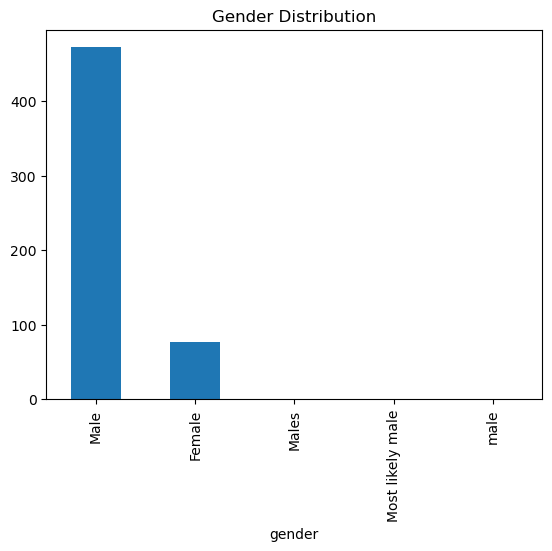

In [29]:
df['gender'].value_counts().plot(kind='bar', title='Gender Distribution')
plt.show()

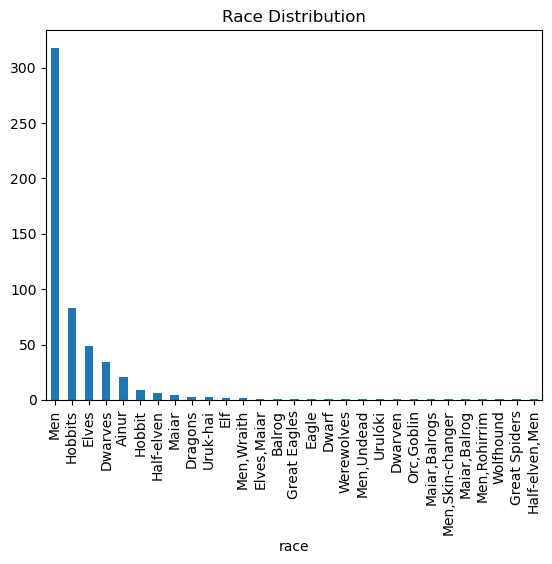

In [30]:
df['race'].value_counts().plot(kind='bar', title='Race Distribution')
plt.show()

Group by race

In [31]:
race_group = df.groupby('race').count()
print(race_group)

                  Unnamed: 0  birth  death  gender  hair  height  name  realm  \
race                                                                            
Ainur                     21     21     21      21     4       6    21     10   
Balrog                     1      1      1       1     1       0     1      0   
Dragons                    3      3      3       3     0       2     3      1   
Dwarf                      1      1      1       1     0       0     1      0   
Dwarven                    1      1      1       1     0       0     1      0   
Dwarves                   34     34     34      34     7       2    34     11   
Eagle                      1      1      1       1     0       0     1      0   
Elf                        2      2      2       2     2       0     2      1   
Elves                     49     49     49      49    40      16    49     22   
Elves,Maiar                1      1      1       1     1       0     1      0   
Great Eagles               1

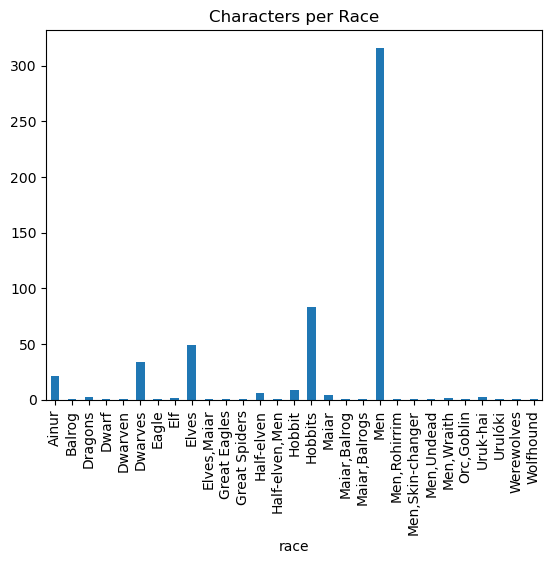

In [32]:
race_group['gender'].plot.bar(title='Characters per Race')
plt.show()

Group by gender and race

In [33]:
gender_race = df.groupby(['gender', 'race'])['name'].count()
print(gender_race)

gender            race            
Female            Ainur                 9
                  Dwarves               1
                  Elves                12
                  Elves,Maiar           1
                  Great Spiders         1
                  Half-elven            1
                  Half-elven,Men        1
                  Hobbit                3
                  Hobbits              19
                  Men                  28
Male              Ainur                12
                  Balrog                1
                  Dragons               3
                  Dwarf                 1
                  Dwarven               1
                  Dwarves              33
                  Eagle                 1
                  Elf                   2
                  Elves                37
                  Great Eagles          1
                  Half-elven            5
                  Hobbit                6
                  Hobbits              63

Pie chart by gender 


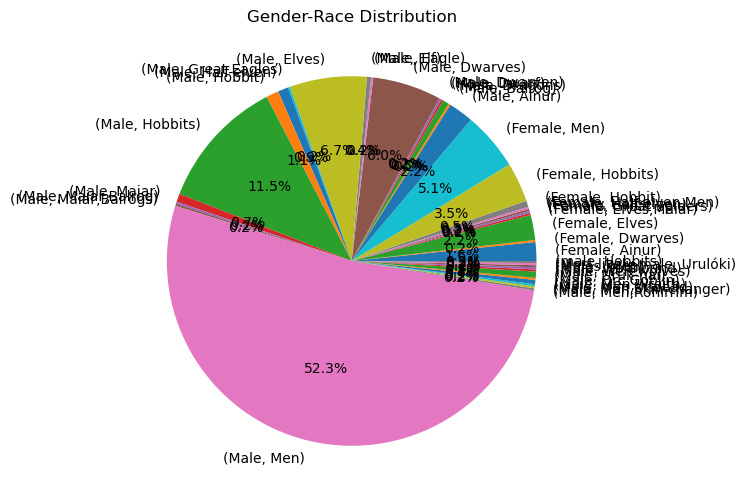

In [34]:
gender_race.plot.pie(ylabel='', autopct='%1.1f%%', figsize=(6, 6), title='Gender-Race Distribution')
plt.show()

Group by gender and realm

In [35]:
realm_group = df.groupby(['race','gender']).count()
print(realms)

NameError: name 'realms' is not defined

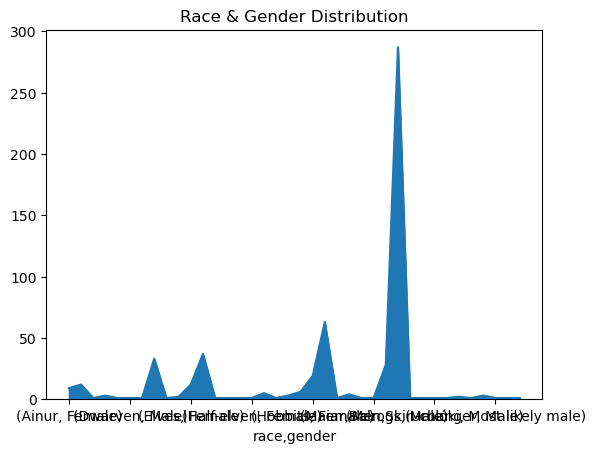

In [ ]:
realm_group['name'].plot.area(title='Race & Gender Distribution')
plt.show()

Handle missing values

In [ ]:
df.isnull().sum()

df['height'] = df['height'].fillna('Unknown')
df['race'] = df['race'].fillna('Unknown')
df['realm'] = df['realm'].fillna('Unknown')
df['spouse'] = df['spouse'].fillna('None')
df['hair'] = df['hair'].fillna('Unknown')

Drop unhelpful columns

In [37]:
df = df.drop(['name', 'birth', 'death'], axis=1)

Encode all categorical features

In [38]:
def encode_features(df):
    df_encoded = df.copy()
    label_encoders = {}

    for column in df_encoded.columns:
        if df_encoded[column].dtype == 'object':
            le = preprocessing.LabelEncoder()
            df_encoded[column] = le.fit_transform(df_encoded[column])
            label_encoders[column] = le

    return df_encoded, label_encoders

df_encoded, encoders = encode_features(df)

Prepare data for ML

In [39]:
X = df_encoded.drop(['gender'], axis=1).values
y = df_encoded['gender'].values

Train split

In [40]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


Train Decision Tree Classifier

In [41]:
clf = DecisionTreeClassifier(max_depth=3)
clf.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=3)

Evaluate the model

In [42]:
accuracy = clf.score(X_test, y_test)
print(f"Decision Tree Accuracy: {accuracy:.2f}")

Decision Tree Accuracy: 0.86
